# Laboratory Tasks

In this notebook all aspects of the laboratory are handled. As in every laboratory you have only a limited amount of resources.

 1. Cloning
 2. Cultivation
 3. Expression measurement

## Set-up your laboratory

In [7]:
# The cloning output is a mutant. Which is the host organism and the promoter sequence.
%matplotlib inline
from BioLabSimFun import Mutant

## Choose host organism
Choosing your biotech-host is extremely simple: just type the name of your favorit bug into the 'Mutant'-command. Your company gives you two organisms, namely *E. coli* (abbr. Ecol) and *P. putida* (abbr. Pput). Use the abbreviation for the selection.

In [8]:
myhost = Mutant('Pput')
myhost.show_BiotechSetting()
# list(vars(myhost).keys())
# print(vars(myhost))

Host: Pput
Resources: 10


## Strain characterization
Your organization has a strain similar to what you wanted, but slightly different. No one knows what the optimal cultivation conditions are. Find out the optimal growth temperature.

<Figure size 432x288 with 0 Axes>

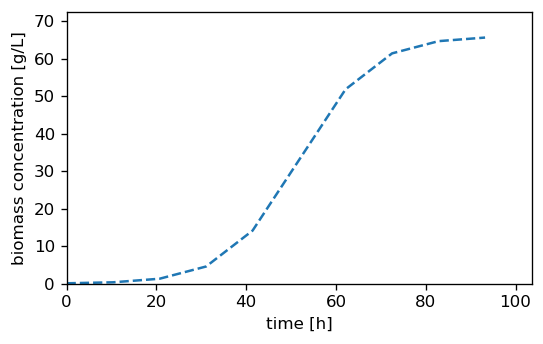

Host: Pput
Resources: 9


In [9]:
# to be coded.
# a graph with a slowly growing growth curve would be cool
# Each test costs one resource

# temperature of cultivation and number of samples have to be defined
CultTemp = 28
n = 11
# experiment
myhost.Make_TempGrowthExp(CultTemp, n, True)

myhost.show_BiotechSetting()
#print('OptTemp: {}'.format(myhost._Mutant__OptTemp))

## Cloning
You are given publication from which you can identify positions for integration. Construct the corresponding primers and run a PCR.
Pseudomonas GC content: [https://doi.org/10.1111/1462-2920.14130](https://doi.org/10.1111/1462-2920.14130)

In [4]:
# to be coded.
# computing of the annealing temperature, etc.
# Probabilitstic cloning success rate.

## Genetic Engineering
You need to identify the optimal promoter sequence for expression of you gene of interest. Read the following article to become an expert on sigma70 driven prokaryotic gene expression: [https://doi.org/10.3390/biom5031245](https://doi.org/10.3390/biom5031245).
Test a couple of promoters, but be aware that each testing costs resources.

The total length of the promoter must be 40 nt.

In [3]:
myhost._Mutant__add_RandomPromoter()
# TestPromoter = 'GCCCATTGACGCTGCCGTAGCGCTCCTATACCCTTGCACG'
# myhost.add_promoter(TestPromoter)
print('Promoter sequence: ',myhost.var_Promoter)
print('GC-content: ', myhost.var_GCcontent)

# the genetic distance to our reference sequence should not be larger than 0.4:
from BioLabSimFun import Sequence_ReferenceDistance
print('genetic distance to ref sequence: ', Sequence_ReferenceDistance(myhost.var_Promoter))
# print('Biomass conc: {}'.format(myhost._Mutant__BiomassMax))

Promoter sequence:  GCCCATTGACCCAAGAAAAGAGAATTTATATTATTGCACG
GC-content:  0.375
genetic distance to ref sequence:  0.425


### Expression Tests

In [4]:
myhost.Make_MeasurePromoterStrength()
myhost.show_BiotechSetting()
# print('Promoter strength: ', myhost.Promoter_Strength)

Host: Pput
Resources: 9
Promoter: GCCCATTGACCCAAGAAAAGAGAATTTATATTATTGCACG
GCcontent: 0.375
PromoterStrength: 0


## Expression measurement

In [5]:
myhost.Make_ProductionExperiment(38)
myhost.show_BiotechSetting()


Host: Pput
Resources: 8
Promoter: GCCCATTGACCCAAGAAAAGAGAATTTATATTATTGCACG
GCcontent: 0.375
PromoterStrength: 0
ExpressionRate: 0.0
